In [2]:
# # Originator: Camille
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = os.path.join(os.getcwd(), "../../raw_data/camille/top_spotify_songs.csv")
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7477 entries, 0 to 7476
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   songs               7476 non-null   object 
 1   artists             7476 non-null   object 
 2   daily_rank          7477 non-null   int64  
 3   daily_movement      7477 non-null   int64  
 4   weekly_movement     7477 non-null   int64  
 5   country             7474 non-null   object 
 6   snapshot_date       7477 non-null   object 
 7   song_popularity     7477 non-null   int64  
 8   album_name          7471 non-null   object 
 9   album_release_date  7472 non-null   object 
 10  danceability        7477 non-null   float64
 11  energy              7477 non-null   float64
 12  key                 7477 non-null   int64  
 13  loudness            7477 non-null   float64
 14  mode                7477 non-null   int64  
 15  speechiness         7477 non-null   float64
 16  acoust

In [5]:
df.head()

,songs,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,song_popularity,album_name,album_release_date,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,artist_popularity,genres,chart_hits
0,1-800-OŚWIECENIE,Taco Hemingway,47,0,3,PL,2023-10-19,71,1-800-OŚWIECENIE,2023-09-21,...,0.2910,0.2680,0.000000,0.266,0.868,135.040,1272680.0,67,"['polish hip hop', 'polish trap']","['mt (9)', 'pl (94)']"
1,Like Ice Spice,Blaqbonez,47,0,3,NG,2023-10-19,66,Like Ice Spice / Bezos,2023-07-07,...,0.2970,0.1260,0.000000,0.231,0.804,178.943,135916.0,44,"['afropop', 'nigerian hip hop', 'nigerian pop']",NaN
2,AMBIENTE ERRADO - Ao Vivo,Luan Santana,46,0,4,BR,2023-10-19,67,LUAN CITY 2.0 - FASE 2,2023-09-14,...,0.0378,0.0368,0.000000,0.341,0.452,119.894,6429598.0,76,"['arrocha', 'sertanejo', 'sertanejo pop', 'ser...","['br (42)', 'lu (1)', 'py (2)', 'pt (10)']"
3,Mexri Telous,Nino Xypolitas,41,0,9,GR,2023-10-19,52,Mexri Telous,2023-10-13,...,0.1450,0.1810,0.000011,0.166,0.581,139.987,46842.0,38,"['greek pop', 'laiko']","['cy (1)', 'gr (2)']"
4,Tsiou,Dirty Harry,38,0,12,GR,2023-10-19,40,Tsiou,2023-10-16,...,0.3450,0.5300,0.000000,0.113,0.612,124.017,25091.0,50,['greek trap'],"['cy (5)', 'gr (13)']"


In [7]:
# Aggregate the data to analyze the relationship between artist popularity and the characteristics of their hit songs
grouped_df = df.groupby("artists").agg({
    "valence": "mean",
    "danceability": "mean",
    "energy": "mean",
    "liveness": "mean",
    "speechiness": "mean",
    "acousticness": "mean",
    "instrumentalness": "mean",
    "tempo": "mean",
    "artist_popularity": "max",
    "followers": "max",
    "songs": "count"
}).reset_index()
grouped_df.rename(columns={"songs": "song_count"}, inplace=True)
print(grouped_df.head())

       artists   valence  danceability   energy  liveness  speechiness  \
0       $kinny  0.123000      0.700000  0.60800  0.193000     0.056800   
1        $ourJ  0.500000      0.684500  0.54150  0.122200     0.104600   
2  $uicideboy$  0.382667      0.720333  0.73900  0.555333     0.130600   
3     (G)I-DLE  0.649375      0.809625  0.82125  0.219150     0.108275   
4       *NSYNC  0.861000      0.610000  0.92600  0.082100     0.047900   

   acousticness  instrumentalness       tempo  artist_popularity  followers  \
0      0.776000          0.000000  112.981000                 41    27388.0   
1      0.247550          0.000000  147.963000                 31     3886.0   
2      0.048133          0.071339  120.297333                 85  4561646.0   
3      0.125762          0.000384  124.359625                 72  3961493.0   
4      0.031000          0.001200  172.638000                 66  1855254.0   

   song_count  
0           1  
1           2  
2           3  
3           8  


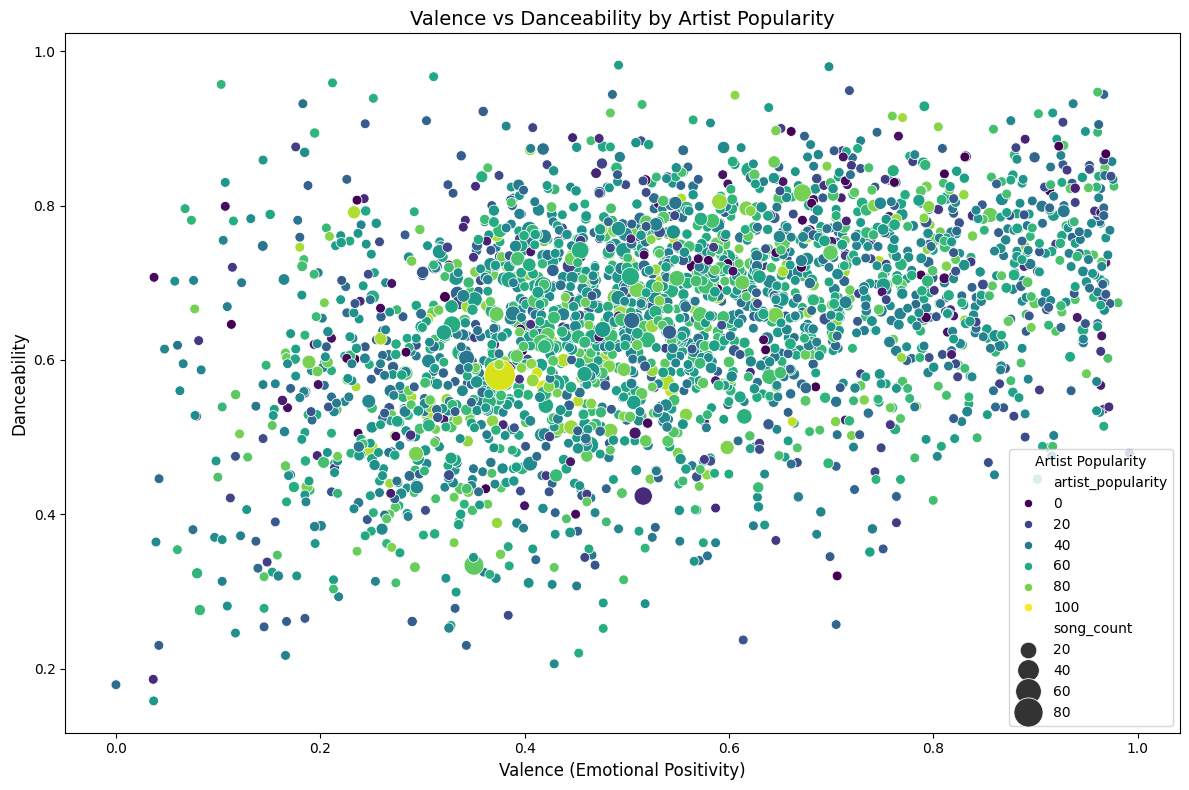

In [22]:
#Basic Graph
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=grouped_df,
    x="valence", y="danceability",
    size="song_count", hue="artist_popularity",
    sizes=(50, 500), palette="viridis", legend="brief"
)
plt.title("Valence vs Danceability by Artist Popularity", fontsize=14)
plt.xlabel("Valence (Emotional Positivity)", fontsize=12)
plt.ylabel("Danceability", fontsize=12)
plt.legend(title="Artist Popularity", loc="best")
plt.tight_layout()
plt.show()

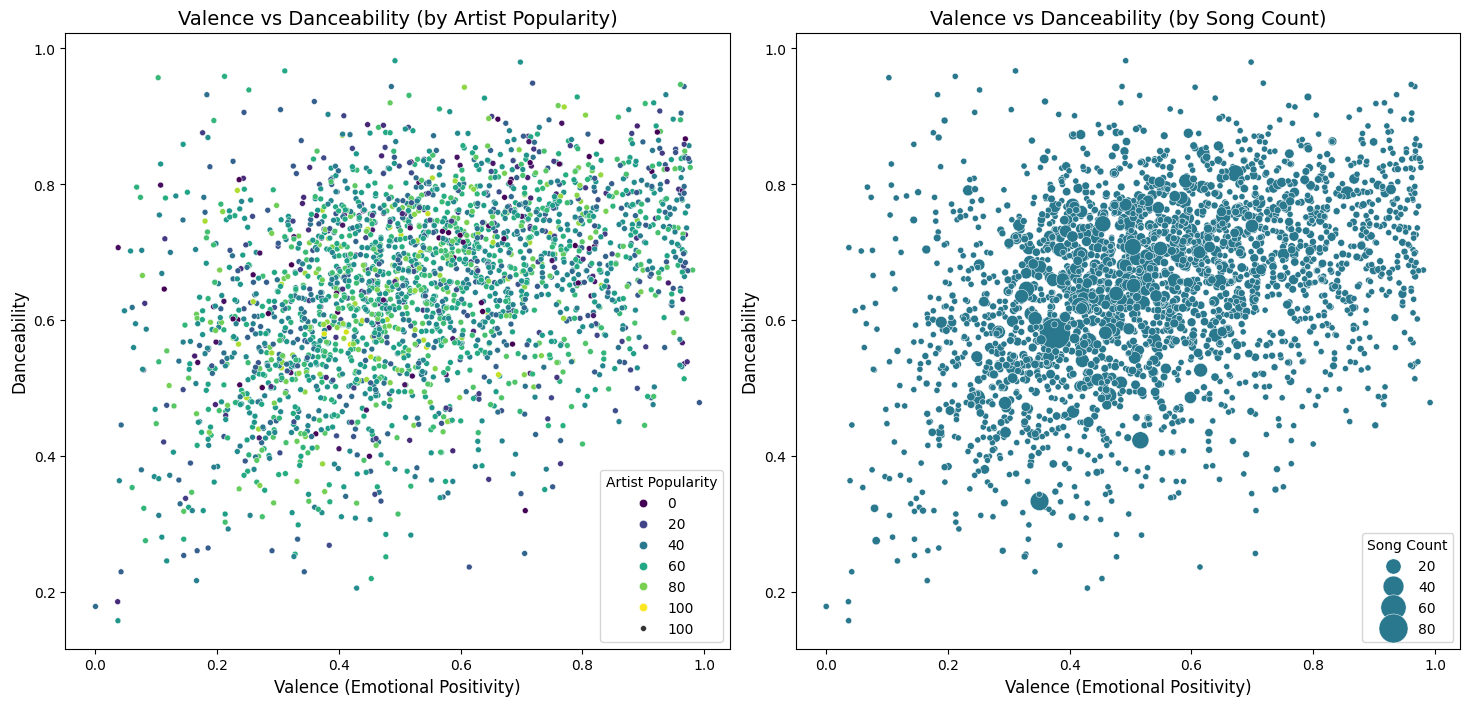

In [23]:
# Set the figure size
plt.figure(figsize=(18, 8)) 

# Left plot: Color represents artist popularity
plt.subplot(1, 2, 1)  # Create the first subplot
sns.scatterplot(
    data=grouped_df,
    x="valence", y="danceability",
    hue="artist_popularity", palette="viridis",  # Use color to show artist popularity
    size=100,  # Fix point size
    legend="brief"
)
plt.title("Valence vs Danceability (by Artist Popularity)", fontsize=14) 
plt.xlabel("Valence (Emotional Positivity)", fontsize=12)
plt.ylabel("Danceability", fontsize=12)
plt.legend(title="Artist Popularity", loc="lower right")

# Right plot: Size represents song count
plt.subplot(1, 2, 2)  # Create the second subplot
sns.scatterplot(
    data=grouped_df,
    x="valence", y="danceability",
    size="song_count", sizes=(20, 500),  # Use size to represent song count
    hue=None, color="#2a788e",  # Use a fixed color
    legend="brief"
)
plt.title("Valence vs Danceability (by Song Count)", fontsize=14)
plt.xlabel("Valence (Emotional Positivity)", fontsize=12)
plt.ylabel("Danceability", fontsize=12)
plt.legend(title="Song Count", loc="lower right")  

# Adjust the spacing between plots to avoid overlap
plt.subplots_adjust(wspace=0.1)

plt.show()

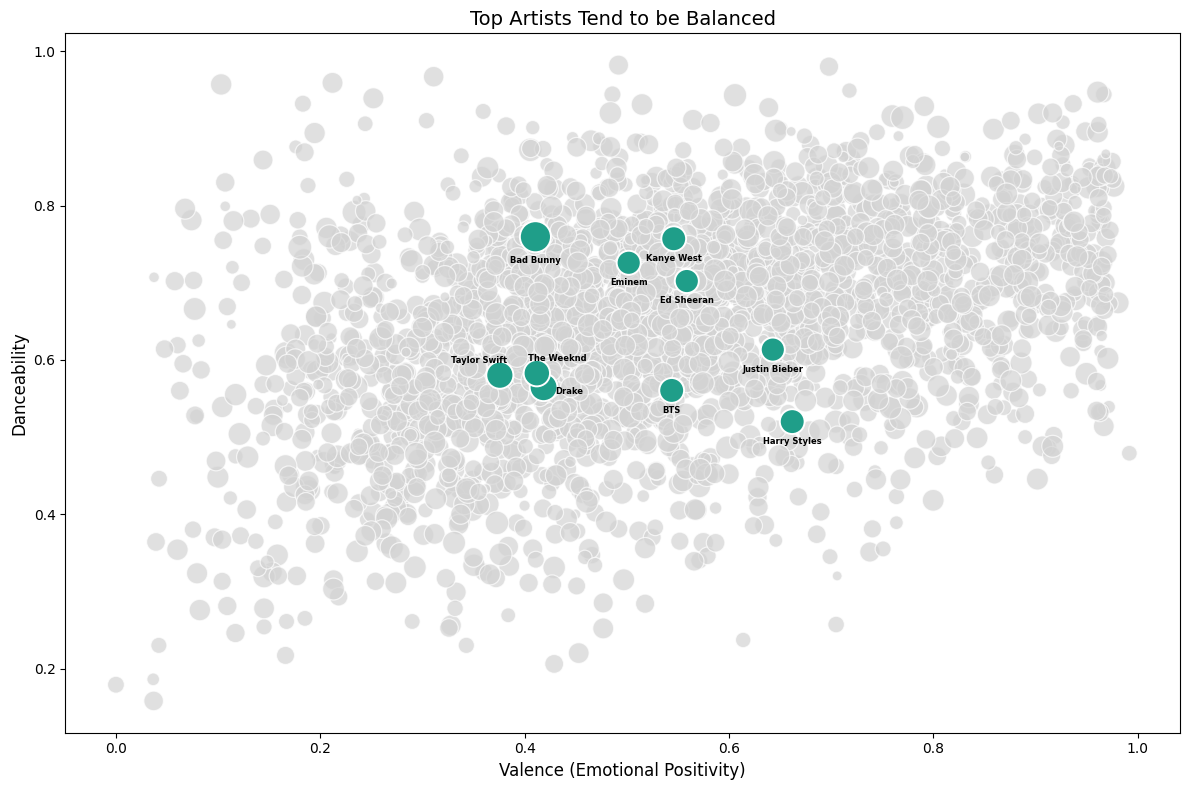

In [35]:
top_10_artists = grouped_df.nlargest(10, "artist_popularity")

# Add a new column to identify the top 10 artists
grouped_df["highlight"] = grouped_df["artists"].apply(lambda x: "Top 10" if x in top_10_artists["artists"].values else "Others")

# Plot all points as the base layer
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=grouped_df[grouped_df["highlight"] == "Others"],
    x="valence",
    y="danceability",
    size="artist_popularity",
    sizes=(50, 300),
    color="lightgray",
    alpha=0.7,
    legend=None
)

# Plot the top 10 artists as a highlighted layer
sns.scatterplot(
    data=grouped_df[grouped_df["highlight"] == "Top 10"],
    x="valence",
    y="danceability",
    size="artist_popularity",
    sizes=(300, 500),
    color="#1f9e89", # color from viridis palette
    alpha=1.0,
    legend=None
)

# Annotate the top 10 artists with their names, adjusting positions to avoid overlaps
for _, row in top_10_artists.iterrows():
    # Adjust text position dynamically
    if row["artists"] == "Drake":
        x_offset = 0.025  # Adjust X position
        y_offset = 0  # Adjust Y position
    elif row["artists"] == "Taylor Swift":
        x_offset = -0.02
        y_offset = 0.025
    elif row["artists"] == "The Weeknd":
        x_offset = 0.02
        y_offset = 0.025
    elif row["artists"] == "Bad Bunny":
        x_offset = 0
        y_offset = -0.025
    else:
        x_offset = 0
        y_offset = -0.02  # Default offset for non-overlapping artists
    
    plt.text(
        row["valence"] + x_offset,  # Add X offset
        row["danceability"] + y_offset,  # Add Y offset
        row["artists"],
        fontsize=6,
        weight="bold",
        color="black",
        ha="center",
        va="top"
    )

# Customize plot appearance
plt.title("Top Artists Tend to be Balanced", fontsize=14)
plt.xlabel("Valence (Emotional Positivity)", fontsize=12)
plt.ylabel("Danceability", fontsize=12)
plt.tight_layout()
plt.show()


In [33]:
path2 = os.path.join(os.getcwd(), "../../raw_data/camille/top_spotify_songs_lyrics.csv")
df2 = pd.read_csv(path)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7477 entries, 0 to 7476
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   songs               7476 non-null   object 
 1   artists             7476 non-null   object 
 2   daily_rank          7477 non-null   int64  
 3   daily_movement      7477 non-null   int64  
 4   weekly_movement     7477 non-null   int64  
 5   country             7474 non-null   object 
 6   snapshot_date       7477 non-null   object 
 7   song_popularity     7477 non-null   int64  
 8   album_name          7471 non-null   object 
 9   album_release_date  7472 non-null   object 
 10  danceability        7477 non-null   float64
 11  energy              7477 non-null   float64
 12  key                 7477 non-null   int64  
 13  loudness            7477 non-null   float64
 14  mode                7477 non-null   int64  
 15  speechiness         7477 non-null   float64
 16  acoust